In [1]:
# Tarefa pode ser feita em grupo 
# Carregue o conjunto de dados MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# Separe as variáveis
X = mnist.data
y = mnist.target

In [2]:

# Divida o conjunto de dados em conjuntos de treinamento e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 


In [3]:

# Crie o modelo de Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(random_state=42)
# Treine o modelo de Árvore de Decisão
arvore.fit(X_train, y_train)


# Faça previsões no conjunto de teste
y_pred = arvore.predict(X_test)


In [4]:
# Avalie a Matriz de Confusão do modelo de Árvore de Decisão
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
 
acc_tree = accuracy_score(y_test, y_pred)

[[1239    4   16    8    7   17   23    3   19    7]
 [   1 1520    7   12   13    4    6   11   22    4]
 [  21   20 1144   45   19   14   25   26   48   18]
 [  11    7   38 1205    9   61   12   25   31   34]
 [   9    3   11   11 1122   16   16   14   24   69]
 [  25   14   13   66   17 1038   25    6   44   25]
 [  23    9   10    5   22   26 1262    3   30    6]
 [   4   13   24   25   19    5    2 1360   17   34]
 [  12   14   37   56   30   45   23   13 1091   36]
 [   5    7   12   22   74   27    5   38   38 1192]]


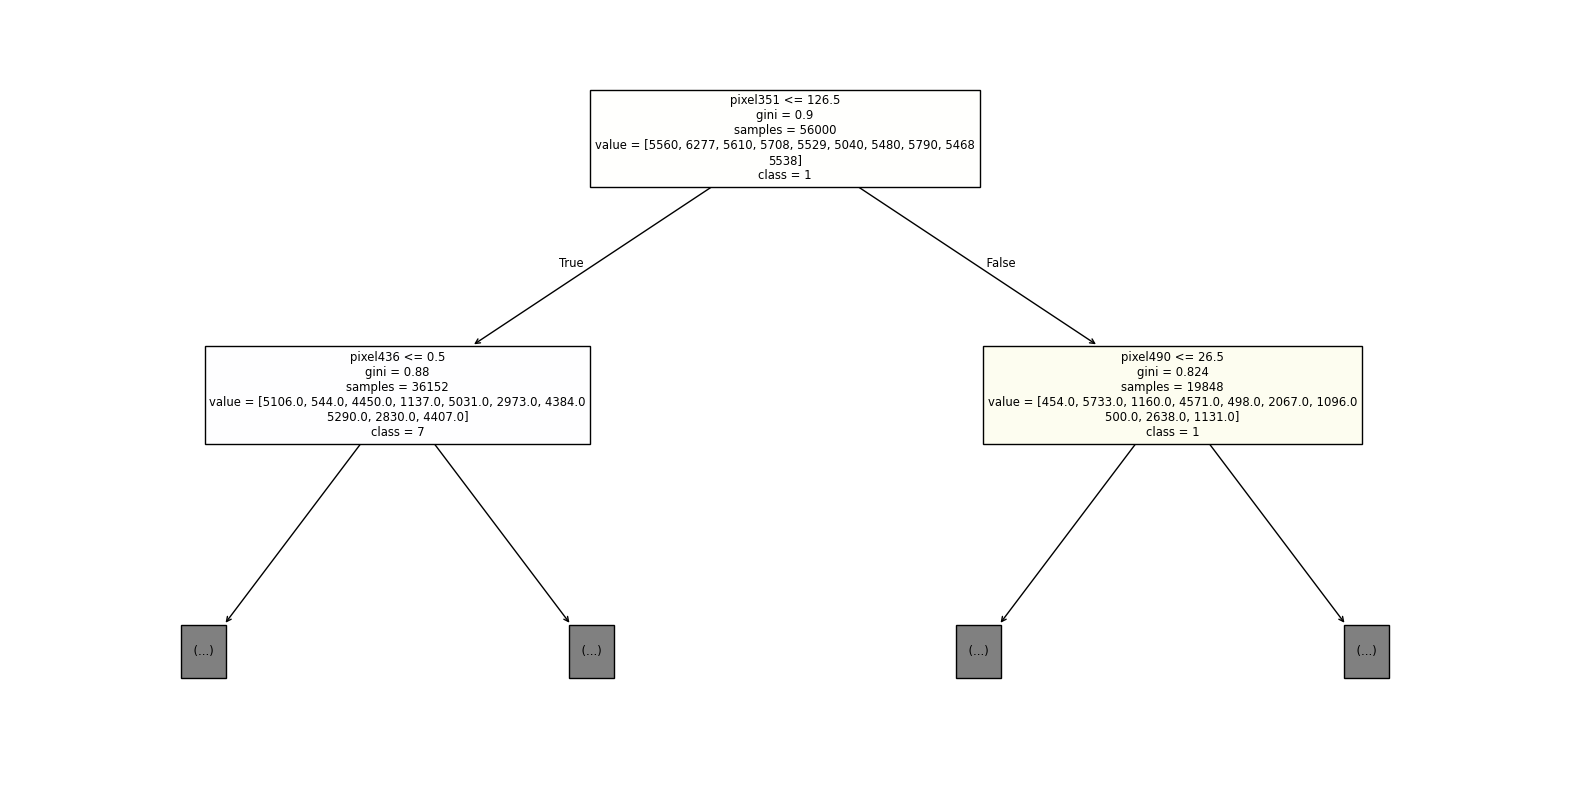

In [5]:
# Imprima a Árvore de Decisão criada
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(arvore, filled=True, feature_names=list(X.columns), class_names=[str(c) for c in arvore.classes_], max_depth=1)
plt.show()

In [6]:

# Vale a pena mudar algum parâmetro da árvore para obter melhores resultados?
#R: Sim, mudando o critério default(Gini), para o "Entropy" é possível perceber melhora na matriz de confusão
arvore_entropia = DecisionTreeClassifier(random_state=42, criterion="entropy")

arvore_entropia.fit(X_train, y_train)




DecisionTreeClassifier(criterion='entropy', random_state=42)

In [7]:
y_pred = arvore_entropia.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

print(cm)

[[1237    0   13    6    8   14   22    8   19   16]
 [   0 1543   10    9    4    5    1   14   10    4]
 [  11   21 1187   35   17   16   20   31   29   13]
 [   2    8   41 1203    6   67    7   28   47   24]
 [   5    5   13    5 1138    7   13   12   33   64]
 [  13    9   15   70   13 1054   30    6   34   29]
 [  12    7   17    5   19   24 1267    7   31    7]
 [   5   14   43   14   17    6    1 1364   10   29]
 [   5   18   28   48   29   34   23   13 1127   32]
 [   8    6   14   21   80   35    5   26   22 1203]]


In [8]:
#Experimente Modelos de Bagging. Boost e Staching e compare seus desempenhos com o modelo de árvore, sugerido inicialmente

In [9]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

bagging.fit(X_train, y_train)

y_pred_bagging = bagging.predict(X_test)

acc_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Acurácia (Bagging): {acc_bagging:.4f}")


Acurácia (Bagging): 0.9556


In [10]:
from sklearn.ensemble import AdaBoostClassifier

boosting = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

boosting.fit(X_train, y_train)
y_pred_boost = boosting.predict(X_test)
acc_boost = accuracy_score(y_test, y_pred_boost)
print(f"Acurácia (Boosting - AdaBoost): {acc_boost:.4f}")

Acurácia (Boosting - AdaBoost): 0.7174


In [11]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = [
    ('tree', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True))
]

stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

stacking.fit(X_train, y_train)
y_pred_stack = stacking.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)
print(f"Acurácia (Stacking): {acc_stack:.4f}")


Acurácia (Stacking): 0.9766


In [12]:
print("\nResumo das acurácias:")
print(f"Árvore Simples:   {acc_tree:.4f}")
print(f"Bagging:          {acc_bagging:.4f}")
print(f"Boosting:         {acc_boost:.4f}")
print(f"Stacking:         {acc_stack:.4f}")



Resumo das acurácias:
Árvore Simples:   0.8695
Bagging:          0.9556
Boosting:         0.7174
Stacking:         0.9766
